In [29]:
# World Happiness 2015

In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import squarify
from matplotlib import pyplot as plt
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
#plt.style.use('bmh')
pd.set_option('display.max_columns', 500)

In [31]:
data = pd.read_csv(r'D:\PycharmProjects\EDA-ML\Happiness\2015.csv')

In [44]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [46]:
# Country - Name of the country.
# Region - Region the country belongs to.
# Happiness Rank - Rank of the country based on the Happiness Score.
# Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
# Standard Error - The standard error of the happiness score.
# Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.
# Family - The extent to which Family contributes to the calculation of the Happiness Score
# Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score
# Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.
# Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score.
# Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.
# Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [32]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [33]:
data.shape

(158, 12)

In [43]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [35]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [36]:
data['Country'].value_counts().sort_values(ascending=False).head()

Myanmar         1
Italy           1
Hungary         1
Saudi Arabia    1
Zimbabwe        1
Name: Country, dtype: int64

In [38]:
pd.DataFrame(data['Happiness Score'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,158.0,5.375734,1.14501,2.839,4.526,5.2325,6.24375,7.587


In [10]:
colory = []
colors_score = data['Happiness.Score'].sort_values(ascending=False)
for i in range(30):
    if colors_score[i] >= colors_score.quantile(0.95):
        colory.append('#0B486B')
    elif colors_score[i] >= colors_score.quantile(0.86):
            colory.append('#c55572')
    else:
            colory.append('#b3b7b8')


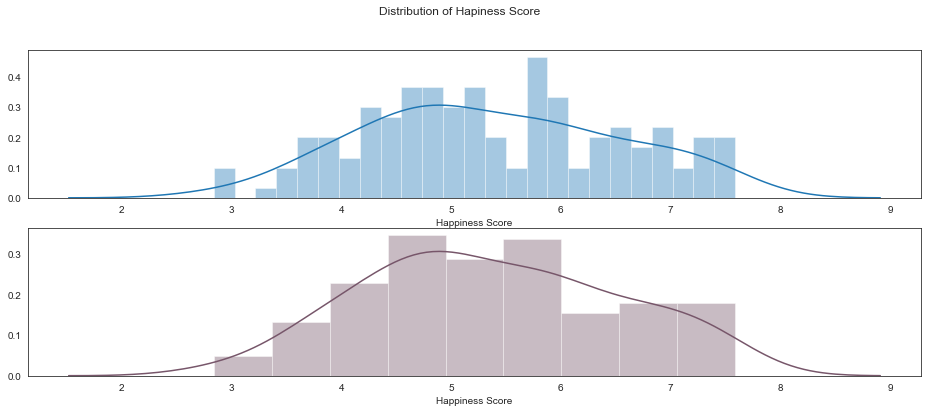

In [39]:
f,ax = plt.subplots(2,1,figsize=(16,6))
a0 = sns.distplot(data['Happiness Score'],bins=25,ax=ax[0])
a01 = sns.distplot(data['Happiness Score'],bins=9,ax=ax[1],color='#77566A')
plt.suptitle('Distribution of Hapiness Score');

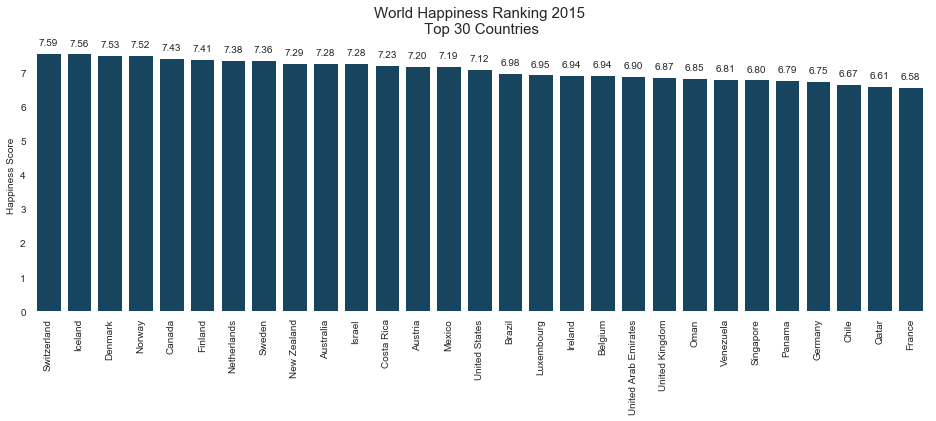

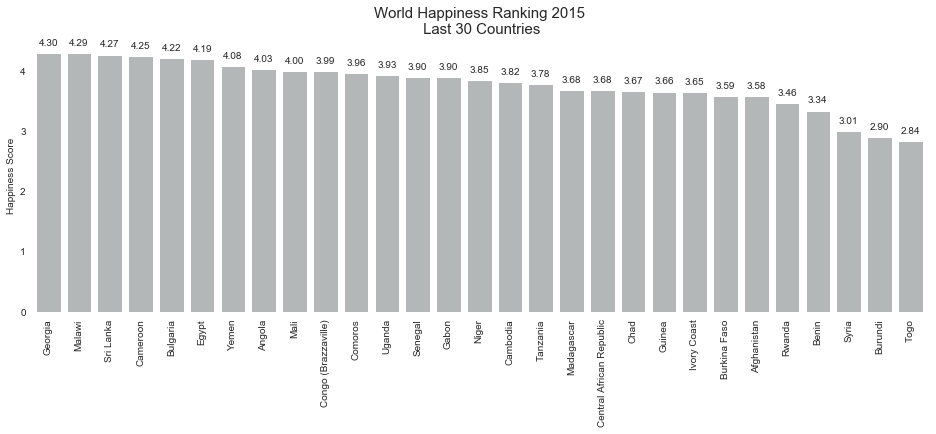

In [42]:
f,ax = plt.subplots(1,1,figsize=(16,5))
a1 = sns.barplot(x='Country',y='Happiness Score',data=data.head(29),ax=ax,color='#0B486B')
a1.set_xlabel('');
plt.xticks(rotation=90);
a1.set_title('World Happiness Ranking 2015\n Top 30 Countries',fontsize=15);
sns.despine(bottom=True,left=True);
for p in a1.patches:
    a1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
f,ax = plt.subplots(1,1,figsize=(16,5))    
a2 = sns.barplot(x='Country',y='Happiness Score',data=data.tail(29),ax=ax,color='#b3b7b8')
a2.set_xlabel('');
plt.xticks(rotation=90);
a2.set_title('World Happiness Ranking 2015\n Last 30 Countries',fontsize=15);
sns.despine(bottom=True,left=True);
for p in a2.patches:
    a2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* Mean Happiness Score in 2015 was: 5.375734
* Most of countries has Happiness Score in range 4.5 - 6.5
* Top 5 Countries by Happiness Score are: 
    * Switzerland, 
    * Iceland, 
    * Denmark, 
    * Norwey, 
    * Canada 
* So we can see that in top 5 there are a lot of Nordic (Scandinavian) countries

* If we look at countries with lowest Happiness Score we can list:
    * Togo
    * Burundi
    * Syria
    * Benin
    * Rwanda

In [85]:
data.groupby('Region')['Happiness Score'].agg(['mean','count']).sort_values(by='mean',ascending=False).T

Region,Australia and New Zealand,North America,Western Europe,Latin America and Caribbean,Eastern Asia,Middle East and Northern Africa,Central and Eastern Europe,Southeastern Asia,Southern Asia,Sub-Saharan Africa
mean,7.285,7.273,6.689619,6.144682,5.626167,5.4069,5.332931,5.317444,4.580857,4.2028
count,2.000,2.000,21.000000,22.000000,6.000000,20.0000,29.000000,9.000000,7.000000,40.0000


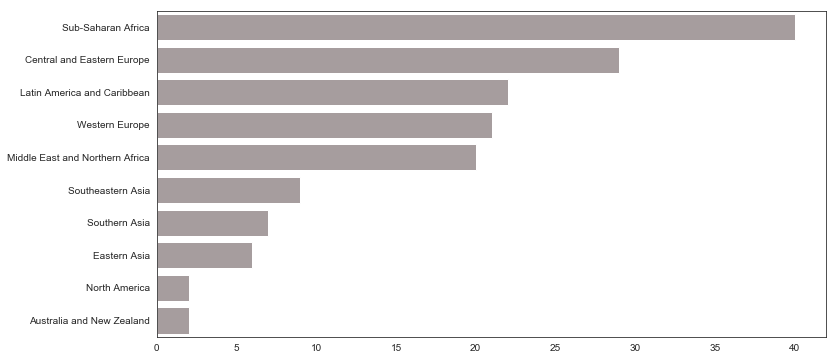

In [91]:
f,ax = plt.subplots(1,1,figsize=(12,6))
c0 = sns.barplot(y=data.groupby('Region')['Happiness Score'].count().sort_values(ascending=False).index,
            x= data.groupby('Region')['Happiness Score'].count().sort_values(ascending=False).values,palette=['#A89B9D'])
plt.xlabel('');
plt.ylabel('');

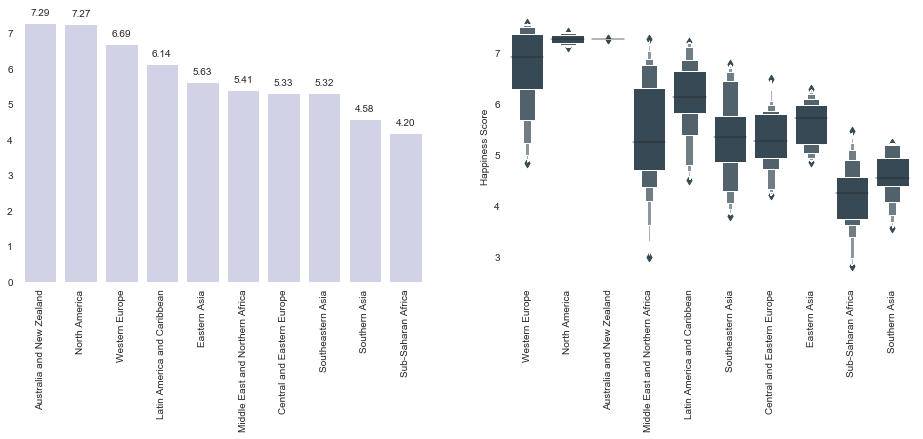

In [92]:
f,ax = plt.subplots(1,2,figsize=(16,5))
c1 = sns.barplot(x=data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).index,
            y= data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).values,ax=ax[0],palette=['#CFCFEA'])

#ax.set_xticklabels(labels, rotation=45)
for p in c1.patches:
    c1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')  
sns.despine(bottom=True, left=True)
c2 = sns.boxenplot(y='Happiness Score',x='Region',data=data,ax=ax[1],palette=['#314A59'])
plt.setp(c1.xaxis.get_majorticklabels(), rotation=90);
plt.setp(c2.xaxis.get_majorticklabels(), rotation=90);
c1.set_xlabel('');
c2.set_xlabel('');